# Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Dataset/Diarrhea
%ls

/content/drive/MyDrive/Dataset/Diarrhea
 cos1.dot     Diare.csv   golf_df.csv               search2.csv   tree2.dot
 cusdm1.csv   dm01.csv   'Laporan Diare 2019.xls'   search3.csv   tree3.dot
 cusdm2.csv   dm02.csv    modelDT.pkl               search4.csv   tree4.dot
 cusdm3.csv   dm03.csv    savecsv.csv               search.csv    tree.dot


In [3]:
import csv
import joblib
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from graphviz import Source
import matplotlib.pyplot as plt
from collections import Counter
from warnings import simplefilter
from sklearn.tree import export_text
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
from imblearn.over_sampling import SMOTE
from IPython.display import display, SVG
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split as tt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

#ignore all future warning
simplefilter(action='ignore', category=FutureWarning)
da= pd.read_csv('Diare.csv')
da

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


,Demam,Muntah,Mulut Kering,Nyeri di Perut,BAB lebih dari 2 minggu,BAB lebih dari 3x Sehari,Feses Encer,Feses Berdarah/Berlendir,Diare
0,Tidak,Ya,Ya,Ya,Tidak,Ya,Tidak,Berlendir,Akut
1,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Ya,Tidak,Akut
2,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Berlendir,Akut
3,Tidak,Tidak,Ya,Tidak,Tidak,Ya,Tidak,Berlendir,Akut
4,Tidak,Ya,Ya,Ya,Tidak,Ya,Tidak,Berlendir,Akut
...,...,...,...,...,...,...,...,...,...
500,Tidak,Tidak,Ya,Tidak,NaN,Ya,Ya,Berdarah,Akut
501,Tidak,Ya,Ya,Tidak,Tidak,Tidak,Ya,Berdarah,Akut
502,Ya,Tidak,Ya,Tidak,Tidak,Ya,Ya,Tidak,Akut
503,Tidak,Ya,Ya,Tidak,Tidak,Tidak,Ya,Berlendir,Akut


Jumlah missing data:  23 



Text(0, 0.5, 'Frekuensi')

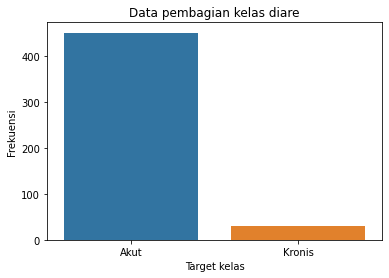

In [4]:
#drop missing data
data = da.dropna()
print('Jumlah missing data: ', (len(da)-len(data)),'\n')

# renaming column each dataset
data = data.rename(columns={'Nyeri di Perut':'Nyeri',
                                    'Mulut Kering':'MK',
                                    'BAB lebih dari 2 minggu':'BAB_1',
                                    'BAB lebih dari 3x Sehari':'BAB_2',
                                    'Feses Encer':'FE',
                                    'Feses Berdarah/Berlendir':'FBoB'})


#Check pembagian tiap target class untuk tiap dataset
sns.countplot(x = data['Diare'])
plt.title('Data pembagian kelas diare')
plt.xlabel('Target kelas')
plt.ylabel('Frekuensi')

In [5]:
#Encode using LabelEncoder
le = LabelEncoder()
#data = data.apply(le.fit_transform)

clf= DecisionTreeClassifier(criterion='gini')
X = data.drop(columns='Diare')
y = data['Diare']

X = X.apply(le.fit_transform)
#X = data.iloc[:, 0:-1]
#y = data.iloc[:, 8]


#X[:, 0] = le.fit_transform(X[:, 0]) 
#X[:, 1] = le.fit_transform(X[:, 1]) 
#X[:, 2] = le.fit_transform(X[:, 2]) 
#X[:, 3] = le.fit_transform(X[:, 3]) 
#X[:, 4] = le.fit_transform(X[:, 4]) 
#X[:, 5] = le.fit_transform(X[:, 5]) 
#X[:, 6] = le.fit_transform(X[:, 6]) 
#X[:, 7] = le.fit_transform(X[:, 7]) 

In [6]:
X

,Demam,Muntah,MK,Nyeri,BAB_1,BAB_2,FE,FBoB
0,0,1,1,1,0,1,0,1
1,0,0,0,0,0,1,1,2
2,0,0,0,0,0,0,1,1
3,0,0,1,0,0,1,0,1
4,0,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...
498,1,0,0,1,1,1,1,0
499,1,0,0,1,1,1,1,0
501,0,1,1,0,0,0,1,0
502,1,0,1,0,0,1,1,2


# Learn model

In [7]:
def normal():
  #Splitting data train and test
  X_train, X_test, y_train, y_test = tt(X,y, test_size=0.2, random_state=20)
  print(Counter(y_train), '\n')
  
  #Proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  acc = metrics.accuracy_score(y_test, y_pred)*100
  joblib.dump(clf, 'normal.pkl')
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=X.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def over():
  #get balanced data sample also splitting data train and test
  ros = RandomOverSampler(sampling_strategy='minority')
  X_over, y_over = ros.fit_resample(X,y)
  X_train, X_test, y_train, y_test = tt(X_over, y_over, test_size=0.2, random_state=8)
  print(Counter(y_over))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  acc = metrics.accuracy_score(y_test, y_pred)*100
  joblib.dump(clf, 'over.pkl')
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=X.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def under():
  #get balanced data sample also splitting data train and test
  rus = RandomUnderSampler(random_state=8)
  X_under, y_under = rus.fit_resample(X,y)
  X_train, X_test, y_train, y_test = tt(X_under, y_under, test_size=0.2, random_state=8)
  print(Counter(y_under))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  acc = metrics.accuracy_score(y_test, y_pred)*100
  joblib.dump(clf, 'under.pkl')
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=X.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)


Counter({'Akut': 359, 'Kronis': 26}) 

              precision    recall  f1-score   support

        Akut       1.00      1.00      1.00        92
      Kronis       1.00      1.00      1.00         5

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



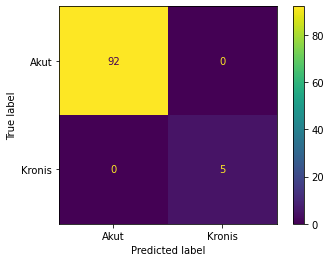

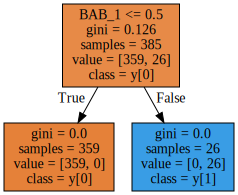



|--- feature_4 <= 0.50
|   |--- class: Akut
|--- feature_4 >  0.50
|   |--- class: Kronis



In [8]:
normal()

Counter({'Akut': 451, 'Kronis': 451})
              precision    recall  f1-score   support

        Akut       1.00      1.00      1.00        90
      Kronis       1.00      1.00      1.00        91

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181



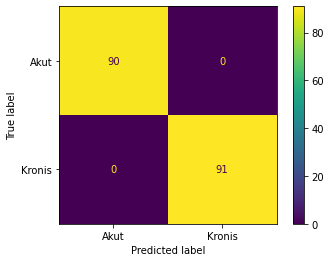

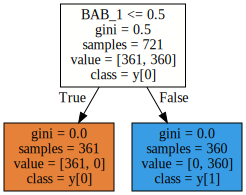



|--- feature_4 <= 0.50
|   |--- class: Akut
|--- feature_4 >  0.50
|   |--- class: Kronis



In [9]:
over()

Counter({'Akut': 31, 'Kronis': 31})
              precision    recall  f1-score   support

        Akut       1.00      1.00      1.00         7
      Kronis       1.00      1.00      1.00         6

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



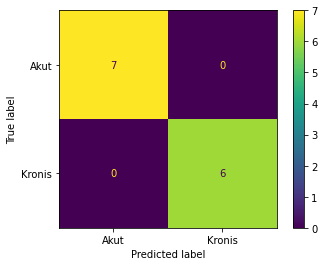

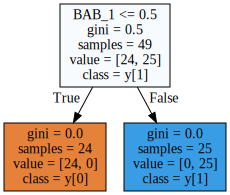



|--- feature_4 <= 0.50
|   |--- class: Akut
|--- feature_4 >  0.50
|   |--- class: Kronis



In [10]:
under()

# Test Predict start here

In [22]:
def test_normal():
  while True:
    try:
      print('======================================================\n')
      print('======================================================')
      de = int(input('\n  kondisi demam. 1 untuk ya, 0 untuk tidak: '))
      if de > 1 or de < 0:
        raise AssertionError

      mu = int(input('\n  kondisi muntah. 1 untuk ya, 0 untuk tidak: '))
      if mu > 1 or mu < 0:
        raise AssertionError
      
      mk = int(input('\n  kondisi mulut kering. 1 untuk ya, 0 untuk tidak: '))
      if mk > 1 or mk < 0:
        raise AssertionError
      
      ny = int(input('\n  kondisi nyeri di perut. 1 untuk ya, 0 untuk tidak: '))
      if ny > 1 or ny < 0:
        raise AssertionError
      
      bab1 = int(input('\n  kondisi BAB lebih dari 2 minggu. 1 untuk ya, 0 untuk tidak: '))
      if bab1 > 1 or bab1 < 0:
        raise AssertionError
      
      bab2 = int(input('\n  kondisi BAB lebih dari 3x sehari. 1 untuk ya, 0 untuk tidak: '))
      if bab2 > 1 or bab2 < 0:
        raise AssertionError
      
      fe = int(input('\n  kondisi feses encer. 1 untuk ya, 0 untuk tidak: '))
      if fe > 1 or fe < 0:
        raise AssertionError
      
      fb = int(input('\n  kondisi feses berdarah atau berlendir. 2 untuk tidak sama sekali, 1 untuk berlendir, 0 untuk berdarah: '))
      if fb > 2 or fb < 0:
        raise AssertionError1
      break
    except ValueError:
      print('Please input integer only...')
    except AssertionError:
      print('Please input integer between 1 or 0')
    except AssertionError1:
      print('Please input integer between 0 and 2')
      continue

  pred = [[de,mu,mk,ny,bab1,bab2,fe,fb]]
  print('\n',pred)

  load_model = joblib.load('normal.pkl')
  result=(load_model.predict(pred))
  print('\n',result)

test_normal()



  kondisi demam. 1 untuk ya, 0 untuk tidak: 0

  kondisi muntah. 1 untuk ya, 0 untuk tidak: 0

  kondisi mulut kering. 1 untuk ya, 0 untuk tidak: 0

  kondisi nyeri di perut. 1 untuk ya, 0 untuk tidak: 1

  kondisi BAB lebih dari 2 minggu. 1 untuk ya, 0 untuk tidak: 1

  kondisi BAB lebih dari 3x sehari. 1 untuk ya, 0 untuk tidak: 1

  kondisi feses encer. 1 untuk ya, 0 untuk tidak: 0

  kondisi feses berdarah atau berlendir. 2 untuk tidak sama sekali, 1 untuk berlendir, 0 untuk berdarah: 0

 [[0, 0, 0, 1, 1, 1, 0, 0]]

 ['Kronis']


In [23]:
def test_over():
  while True:
    try:
      print('======================================================\n')
      print('======================================================')
      de = int(input('\n  kondisi demam. 1 untuk ya, 0 untuk tidak: '))
      if de > 1 or de < 0:
        raise AssertionError

      mu = int(input('\n  kondisi muntah. 1 untuk ya, 0 untuk tidak: '))
      if mu > 1 or mu < 0:
        raise AssertionError
      
      mk = int(input('\n  kondisi mulut kering. 1 untuk ya, 0 untuk tidak: '))
      if mk > 1 or mk < 0:
        raise AssertionError
      
      ny = int(input('\n  kondisi nyeri di perut. 1 untuk ya, 0 untuk tidak: '))
      if ny > 1 or ny < 0:
        raise AssertionError
      
      bab1 = int(input('\n  kondisi BAB lebih dari 2 minggu. 1 untuk ya, 0 untuk tidak: '))
      if bab1 > 1 or bab1 < 0:
        raise AssertionError
      
      bab2 = int(input('\n  kondisi BAB lebih dari 3x sehari. 1 untuk ya, 0 untuk tidak: '))
      if bab2 > 1 or bab2 < 0:
        raise AssertionError
      
      fe = int(input('\n  kondisi feses encer. 1 untuk ya, 0 untuk tidak: '))
      if fe > 1 or fe < 0:
        raise AssertionError
      
      fb = int(input('\n  kondisi feses berdarah atau berlendir. 2 untuk tidak sama sekali, 1 untuk berlendir, 0 untuk berdarah: '))
      if fb > 2 or fb < 0:
        raise AssertionError1
      break
    except ValueError:
      print('Please input integer only...')
    except AssertionError:
      print('Please input integer between 1 or 0')
    except AssertionError1:
      print('Please input integer between 0 and 2')
      continue

  pred = [[de,mu,mk,ny,bab1,bab2,fe,fb]]
  print('\n',pred)

  load_model = joblib.load('over.pkl')
  result=(load_model.predict(pred))
  print('\n',result)

test_over()



  kondisi demam. 1 untuk ya, 0 untuk tidak: 0

  kondisi muntah. 1 untuk ya, 0 untuk tidak: 0

  kondisi mulut kering. 1 untuk ya, 0 untuk tidak: 0

  kondisi nyeri di perut. 1 untuk ya, 0 untuk tidak: 1

  kondisi BAB lebih dari 2 minggu. 1 untuk ya, 0 untuk tidak: 1

  kondisi BAB lebih dari 3x sehari. 1 untuk ya, 0 untuk tidak: 1

  kondisi feses encer. 1 untuk ya, 0 untuk tidak: 0

  kondisi feses berdarah atau berlendir. 2 untuk tidak sama sekali, 1 untuk berlendir, 0 untuk berdarah: -
Please input integer only...


  kondisi demam. 1 untuk ya, 0 untuk tidak: 0

  kondisi muntah. 1 untuk ya, 0 untuk tidak: 0

  kondisi mulut kering. 1 untuk ya, 0 untuk tidak: 0

  kondisi nyeri di perut. 1 untuk ya, 0 untuk tidak: 1

  kondisi BAB lebih dari 2 minggu. 1 untuk ya, 0 untuk tidak: 1

  kondisi BAB lebih dari 3x sehari. 1 untuk ya, 0 untuk tidak: 1

  kondisi feses encer. 1 untuk ya, 0 untuk tidak: 0

  kondisi feses berdarah atau berlendir. 2 untuk tidak sama sekali, 1 untuk berlen

In [24]:
def test_under():
  while True:
    try:
      print('======================================================\n')
      print('======================================================')
      de = int(input('\n  kondisi demam. 1 untuk ya, 0 untuk tidak: '))
      if de > 1 or de < 0:
        raise AssertionError

      mu = int(input('\n  kondisi muntah. 1 untuk ya, 0 untuk tidak: '))
      if mu > 1 or mu < 0:
        raise AssertionError
      
      mk = int(input('\n  kondisi mulut kering. 1 untuk ya, 0 untuk tidak: '))
      if mk > 1 or mk < 0:
        raise AssertionError
      
      ny = int(input('\n  kondisi nyeri di perut. 1 untuk ya, 0 untuk tidak: '))
      if ny > 1 or ny < 0:
        raise AssertionError
      
      bab1 = int(input('\n  kondisi BAB lebih dari 2 minggu. 1 untuk ya, 0 untuk tidak: '))
      if bab1 > 1 or bab1 < 0:
        raise AssertionError
      
      bab2 = int(input('\n  kondisi BAB lebih dari 3x sehari. 1 untuk ya, 0 untuk tidak: '))
      if bab2 > 1 or bab2 < 0:
        raise AssertionError
      
      fe = int(input('\n  kondisi feses encer. 1 untuk ya, 0 untuk tidak: '))
      if fe > 1 or fe < 0:
        raise AssertionError
      
      fb = int(input('\n  kondisi feses berdarah atau berlendir. 2 untuk tidak sama sekali, 1 untuk berlendir, 0 untuk berdarah: '))
      if fb > 2 or fb < 0:
        raise AssertionError1
      break
    except ValueError:
      print('Please input integer only...')
    except AssertionError:
      print('Please input integer between 1 or 0')
    except AssertionError1:
      print('Please input integer between 0 and 2')
      continue

  pred = [[de,mu,mk,ny,bab1,bab2,fe,fb]]
  print('\n',pred)

  load_model = joblib.load('under.pkl')
  result=(load_model.predict(pred))
  print('\n',result)

test_under()



  kondisi demam. 1 untuk ya, 0 untuk tidak: 0

  kondisi muntah. 1 untuk ya, 0 untuk tidak: 0

  kondisi mulut kering. 1 untuk ya, 0 untuk tidak: 0

  kondisi nyeri di perut. 1 untuk ya, 0 untuk tidak: 1

  kondisi BAB lebih dari 2 minggu. 1 untuk ya, 0 untuk tidak: 1

  kondisi BAB lebih dari 3x sehari. 1 untuk ya, 0 untuk tidak: 1

  kondisi feses encer. 1 untuk ya, 0 untuk tidak: 0

  kondisi feses berdarah atau berlendir. 2 untuk tidak sama sekali, 1 untuk berlendir, 0 untuk berdarah: 0

 [[0, 0, 0, 1, 1, 1, 0, 0]]

 ['Kronis']
